In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/ERA-V1/Assignments/S7

Mounted at /content/drive
/content/drive/MyDrive/GitHub/ERA-V1/Assignments/S7


# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations



In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


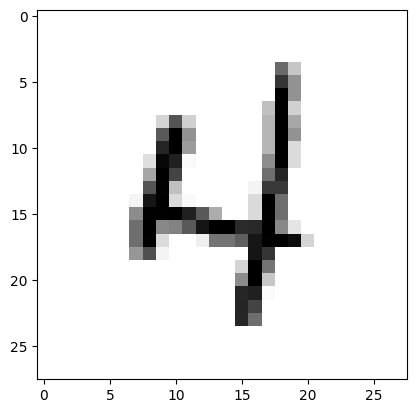

In [ ]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

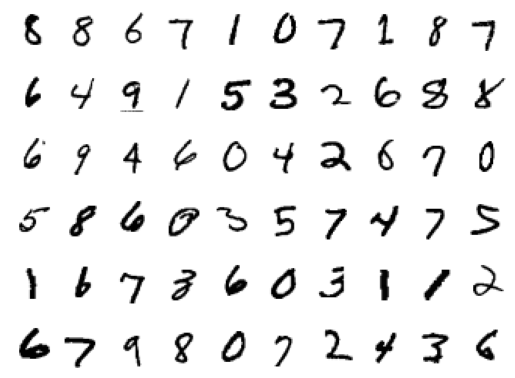

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# The model

In [ ]:
from model import Model1 as Net
model = Net()

# Model Params

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           9,216
              ReLU-4           [-1, 32, 24, 24]               0
         MaxPool2d-5           [-1, 32, 12, 12]               0
            Conv2d-6           [-1, 64, 10, 10]          18,432
              ReLU-7           [-1, 64, 10, 10]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
              ReLU-9             [-1, 64, 8, 8]               0
        MaxPool2d-10             [-1, 64, 4, 4]               0
           Conv2d-11            [-1, 128, 2, 2]          73,728
             ReLU-12            [-1, 128, 2, 2]               0

# Training and Testing



In [ ]:
from utils import train, test, plot_graph

# Let's Train and test our model

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.1165 Batch_id=468 Accuracy=65.12: 100%|██████████| 469/469 [00:18<00:00, 25.92it/s]


Test set: Average loss: 0.0010, Accuracy: 9594/10000 (95.94%)

Epoch 2


Train: Loss=0.0815 Batch_id=468 Accuracy=97.06: 100%|██████████| 469/469 [00:17<00:00, 26.68it/s]


Test set: Average loss: 0.0005, Accuracy: 9807/10000 (98.07%)

Epoch 3


Train: Loss=0.0301 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:18<00:00, 25.70it/s]


Test set: Average loss: 0.0004, Accuracy: 9842/10000 (98.42%)

Epoch 4


Train: Loss=0.0550 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:17<00:00, 26.62it/s]


Test set: Average loss: 0.0003, Accuracy: 9872/10000 (98.72%)

Epoch 5


Train: Loss=0.0554 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:17<00:00, 26.91it/s]


Test set: Average loss: 0.0003, Accuracy: 9879/10000 (98.79%)

Epoch 6


Train: Loss=0.0809 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:18<00:00, 25.03it/s]


Test set: Average loss: 0.0003, Accuracy: 9862/10000 (98.62%)

Epoch 7


Train: Loss=0.0065 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:18<00:00, 25.97it/s]


Test set: Average loss: 0.0003, Accuracy: 9883/10000 (98.83%)

Epoch 8


Train: Loss=0.0263 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:17<00:00, 26.14it/s]


Test set: Average loss: 0.0003, Accuracy: 9889/10000 (98.89%)

Epoch 9


Train: Loss=0.0207 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:19<00:00, 23.52it/s]


Test set: Average loss: 0.0003, Accuracy: 9881/10000 (98.81%)

Epoch 10


Train: Loss=0.0009 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:17<00:00, 26.18it/s]


Test set: Average loss: 0.0002, Accuracy: 9905/10000 (99.05%)

Epoch 11


Train: Loss=0.0559 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:17<00:00, 26.44it/s]


Test set: Average loss: 0.0003, Accuracy: 9894/10000 (98.94%)

Epoch 12


Train: Loss=0.0023 Batch_id=468 Accuracy=99.49: 100%|██████████| 469/469 [00:18<00:00, 25.10it/s]


Test set: Average loss: 0.0002, Accuracy: 9908/10000 (99.08%)

Epoch 13


Train: Loss=0.0072 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:17<00:00, 26.32it/s]


Test set: Average loss: 0.0002, Accuracy: 9899/10000 (98.99%)

Epoch 14


Train: Loss=0.0004 Batch_id=468 Accuracy=99.62: 100%|██████████| 469/469 [00:18<00:00, 25.81it/s]


Test set: Average loss: 0.0003, Accuracy: 9898/10000 (98.98%)

Epoch 15


Train: Loss=0.0057 Batch_id=468 Accuracy=99.66: 100%|██████████| 469/469 [00:17<00:00, 26.21it/s]


Test set: Average loss: 0.0003, Accuracy: 9905/10000 (99.05%)



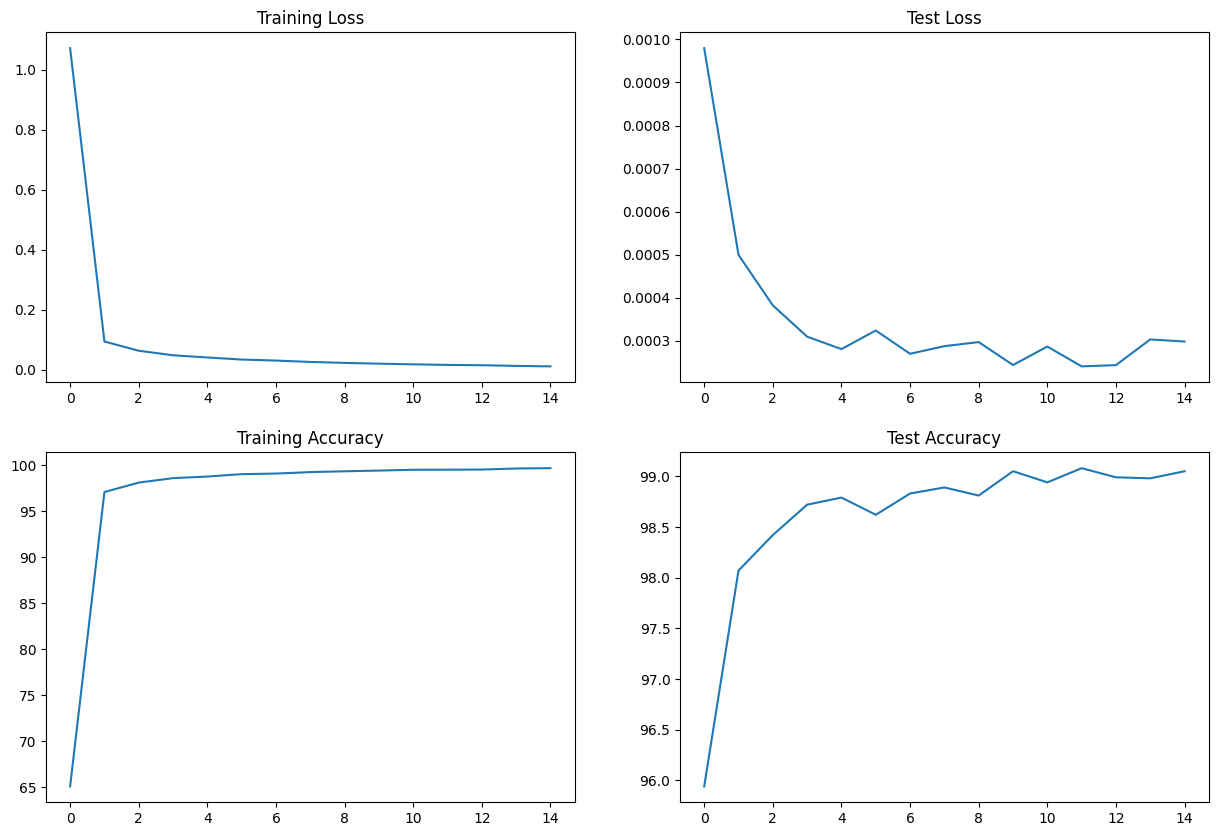

In [ ]:
plot_graph()

## Model 1

### Target
* Get the basic skeleton right. Try and avoid changing this skeleton as much as possible.
* No fancy stuff

### Results:
* Parameters: 139,808
* Best Train Accuracy: 99.66
* Best Test Accuracy: 99.08

### Analysis:
* The model is still large, but working.
* Over-fitting is seen